In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cd data/

/home/mrk/diod_shottky/data


In [3]:
ls # напряжения, при которых снималась ВАХ и которые нужно перевести в температуру 

3.38-3.27.txt  3.68-3.9.txt  3.69-3.89.txt  4.32-4.28.txt  4.89-4.96.txt


# Определение температур, при которых измерялись ВАХ, с погрешностями
Для того, чтобы определить температуру, при которой проходило измерение, зависимость напряжения от температуры на каждом участке клалась прямой (по формуле для прямой через две точки).

In [4]:
def lin_func(x, x1, x2, y1, y2):
    return (y2 - y1) * (x - x1) / (x2 - x1) + y1

In [5]:
# 3.38-3.27 --- интервал напряжений, где измерялась ВАХ (мВ)
x_start = 3.38
x_final = 3.27

# интервал с таблицы
x1 = 3.020  # мВ
x2 = 3.653  # мВ
y1 = 210  # К
y2 = 230  # К

x_izm_err = 1e-2  # измерительная погрешность (мВ)

Ts = np.array([lin_func(x_start, x1, x2, y1, y2),
               lin_func(x_final, x1, x2, y1, y2)])  # К

T1 = Ts.mean()

T_izm_err = (y2 - y1) * x_izm_err / (x2 - x1)
T1_err = np.sqrt(Ts.std()**2 + T_izm_err**2)

print(f"T = {T1:.4} +- {T1_err:.2} К")

T = 219.6 +- 1.8 К


In [6]:
# 3.68-3.9 --- интервал напряжений, где измерялась ВАХ (мВ)
x_start = 3.68
x_final = 3.9

# интервал с таблицы
x1 = 3.653  # мВ
x2 = 3.980  # мВ
y1 = 230  # К
y2 = 240  # К

x_izm_err = 1e-2  # измерительная погрешность (мВ)

Ts = np.array([lin_func(x_start, x1, x2, y1, y2),
               lin_func(x_final, x1, x2, y1, y2)])  # К

T2 = Ts.mean()

T_izm_err = (y2 - y1) * x_izm_err / (x2 - x1)
T2_err = np.sqrt(Ts.std()**2 + T_izm_err**2)

print(f"T = {T2:.4} +- {T2_err:.2} К")

T = 234.2 +- 3.4 К


In [7]:
# 3.69-3.89 --- интервал напряжений, где измерялась ВАХ (мВ)
x_start = 3.69
x_final = 3.89

# интервал с таблицы
x1 = 3.653  # мВ
x2 = 3.980  # мВ
y1 = 230  # К
y2 = 240  # К

x_izm_err = 1e-2  # измерительная погрешность (мВ)

Ts = np.array([lin_func(x_start, x1, x2, y1, y2),
               lin_func(x_final, x1, x2, y1, y2)])  # К

T3 = Ts.mean()

T_izm_err = (y2 - y1) * x_izm_err / (x2 - x1)
T3_err = np.sqrt(Ts.std()**2 + T_izm_err**2)

print(f"T = {T3:.4} +- {T3_err:.2} К")

T = 234.2 +- 3.1 К


In [8]:
# 4.32-4.28 --- интервал напряжений, где измерялась ВАХ (мВ)
x_start = 4.32
x_final = 4.28

# интервал с таблицы
x1 = 3.980  # мВ
x2 = 4.330  # мВ
y1 = 240  # К
y2 = 250  # К

x_izm_err = 1e-2  # измерительная погрешность (мВ)

Ts = np.array([lin_func(x_start, x1, x2, y1, y2),
               lin_func(x_final, x1, x2, y1, y2)])  # К

T4 = Ts.mean()

T_izm_err = (y2 - y1) * x_izm_err / (x2 - x1)
T4_err = np.sqrt(Ts.std()**2 + T_izm_err**2)

print(f"T = {T4:.4} +- {T4_err:.2} К")

T = 249.1 +- 0.64 К


In [9]:
# 4.89-4.96 --- интервал напряжений, где измерялась ВАХ (мВ)
x_start = 4.89
x_final = 4.96

# интервал с таблицы
x1 = 4.660  # мВ
x2 = 5.010  # мВ
y1 = 260  # К
y2 = 270  # К

x_izm_err = 1e-2  # измерительная погрешность (мВ)

Ts = np.array([lin_func(x_start, x1, x2, y1, y2),
               lin_func(x_final, x1, x2, y1, y2)])  # К

T5 = Ts.mean()

T_izm_err = (y2 - y1) * x_izm_err / (x2 - x1)
T5_err = np.sqrt(Ts.std()**2 + T_izm_err**2)

print(f"T = {T5:.4} +- {T5_err:.2} К")

T = 267.6 +- 1.0 К


Сохраним эту фигню в виде массива для удобства обработки

In [23]:
T = np.array([T1, T3, T4, T5])
T_err = np.array([T1_err, T3_err, T4_err, T5_err])

# Cемейство ВАХ диода Шоттки при различных температурах

In [24]:
S = 0.5 * (1e-3)**2  # м**2

vi1 = np.genfromtxt("3.38-3.27.txt")
vi1[:, 1] /= 10 * S

# vi2 = np.genfromtxt("3.68-3.9.txt")
# vi2[:, 1] /= 10 * S

vi3 = np.genfromtxt("3.69-3.89.txt")
vi3[:, 1] /= 10 * S

vi4 = np.genfromtxt("4.32-4.28.txt")
vi4[:, 1] /= 10 * S

vi5 = np.genfromtxt("4.89-4.96.txt")
vi5[:, 1] /= 10 * S

Исключаем всякие выбросы из данных измерений и сохраняем их в виде списков

In [25]:
v = [vi1[:, 0], vi3[:, 0], vi4[:-1, 0], vi5[:-1, 0]]
j = [vi1[:, 1], vi3[:, 1], vi4[:-1, 1], vi5[:-1, 1]]

T0 * k / e = 0.02
T1 * k / e = 0.02
T2 * k / e = 0.02
T3 * k / e = 0.02


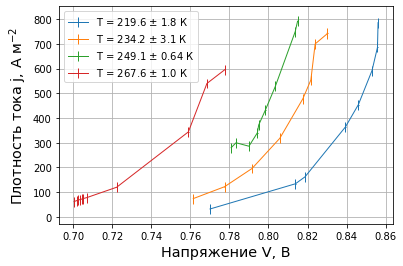

In [26]:
from scipy.constants import k, e, m_e

v_izm_err = 1e-4  # В
j_izm_err = 1e-5 / S  # А м-2

for i in range(4):
    plt.errorbar(v[i], j[i], xerr=v_izm_err, yerr=j_izm_err,
                 label=fr"T = {T[i]:.4} $\pm$ {T_err[i]:.2} К", lw=1)

plt.xlabel('Напряжение V, В', fontsize='x-large')
plt.ylabel(r'Плотность тока j, А м${}^{-2}$', fontsize='x-large')

plt.grid()
plt.legend(loc=2)

for i in range(4):
    print(f'T{i} * k / e = {T[i] * k / e:.1} В')

In [80]:
# вычисление производной

df_dx = lambda f, x: (f[1:-1] - f[:-2]) / (x[1:-1] - x[:-2]) * (x[2:] - x[1:-1]) / (
    x[2:] - x[:-2]) + (f[2:] - f[1:-1]) / (x[2:] - x[1:-1]) * (x[1:-1] - x[:-2]) / (
    x[2:] - x[:-2])

dj_dv = [df_dx(j[i], v[i]) for i in range(4)]

Видно, что все измерения снимались при условии $V > kT/e$

# Определение параметров $A^*$, $\varphi_0$, $n$, $m^*/m$ и типа проводимости

Сначала строим семейство зависимостей $\mathrm{ln}\{ j\,/\, [1 - \mathrm{exp}(-eV\,/\,kT)] \}$ от $V$. В каждом случае делаем линейную регрессию и находим свободный коэффициент, который равен $\mathrm{ln}j_0$.

In [27]:
def func(V, j, T):
    return np.log(j / (1-np.exp(-e * V / (k * T))))

def Delta_func(V, j, T, V_err, j_err, T_err):
    return j_err/j + e/k*(V_err*T+T_err*V)/T**2/(-1+np.exp(e*V/(k*T)))

In [28]:
y = [np.log(j[i] / (1-np.exp(-e * v[i] / (k * T[i]))))
     for i in range(4)]

y_err = [j_izm_err/j[i] + e/k*(v_izm_err*T[i]+T_err[i]*v[i])
         /T[i]**2/(-1+np.exp(e*v[i]/(k*T[i]))) for i in range(4)]

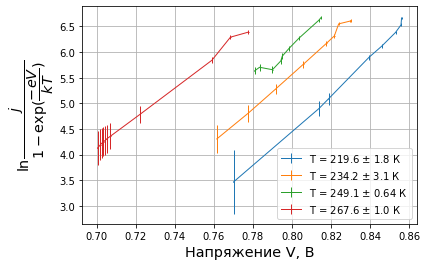

In [29]:
for i in range(4):
    plt.errorbar(v[i], y[i], xerr=v_izm_err, yerr=y_err[i],
                 label=fr"T = {T[i]:.4} $\pm$ {T_err[i]:.2} К", lw=1)
    
plt.xlabel('Напряжение V, В', fontsize='x-large')
plt.ylabel(r'$\mathsf{ln}\dfrac{j}{1-\mathsf{exp}(\dfrac{-eV}{kT})}$', fontsize='x-large')

plt.grid()
plt.legend(loc=4)

Теперь строим зависимость $\mathrm{ln}\{j_0\, /\, T^2\}$ от $1\,/\,T$, снова делаем линейную регрессию. Старший коэффициент будет равен $\mathrm{ln}A^*$, свободный же коэффициент будет равен $-e\varphi_0\,/\,kT$. Отсюда находим эффективную постоянную Ричардсона и эффективную высоту барьера.

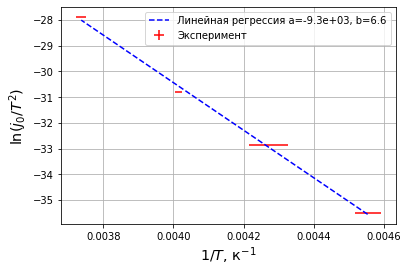

In [69]:
p = np.full((2,4), np.nan)

for i in range(4):
    p[:, i] = np.polyfit(v[i], y[i], 1)

y_new = p[1] - 2 * np.log(T)
x = 1 / T

y_new_err = 0
x_err = T_err / T**2

plt.errorbar(x, y_new, xerr=x_err, yerr=y_new_err, ls='',
             c='red', label='Эксперимент')

a, b = np.polyfit(x, y_new, 1)
plt.plot(x, a*x+b, 'b--', label=f'Линейная регрессия a={a:.2}, b={b:.3}')

plt.xlabel(r'$1/T$, к${}^{-1}$', fontsize='x-large')
plt.ylabel(r'$\mathsf{ln}(j_0/T^2)$', fontsize='x-large')

plt.grid()
plt.legend(loc=1)

In [ ]:
a_err

In [70]:
print(f'phi_0 = {a*k/e:.3} В')

phi_0 = -0.798 В


In [115]:
b_err = (y_new - (a*x+b)).std()
b, b_err

(6.59828990286808, 0.14440445809053765)

In [116]:
print(f'A* = {np.exp(b):.3} +- {np.exp(b)*b_err:.3} А м-2 к-2')

A* = 7.34e+02 +- 1.06e+02 А м-2 к-2


In [73]:
print(f'm*/m = {np.exp(b)/1.2e6:.2}')

m*/m = 0.00061


Определение фактора неидиальности производится по формуле $$n = \frac{ej}{kT\; \mathrm{d}{j}\,/\,\mathrm{d}{V}}$$

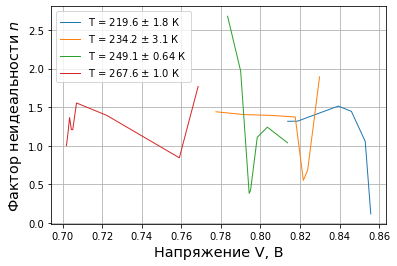

In [97]:
for i in range(4):
    plt.plot(v[i][1:-1], e*j[i][1:-1]/(dj_dv[i]*k*T[i]), 
             label=fr"T = {T[i]:.4} $\pm$ {T_err[i]:.2} К", lw=1)

plt.xlabel('Напряжение V, В', fontsize='x-large')
plt.ylabel(r'Фактор неидеальности $n$', fontsize='x-large')

plt.grid()
plt.legend()

In [105]:
n = np.array(e*j[0][1:-1]/(dj_dv[0]*k*T[0]))
for i in range(1,4):
    n = np.append(n, np.array(e*j[i][1:-1]/(dj_dv[i]*k*T[i])))

In [107]:
n.mean()

1.236578146142738

In [108]:
n.std()

0.5059423200389976